## Advanced Python AI and ML Tools - Assignment 1

Group Name: Sushil Basi (C0868003), Samir Khanal (C0869664), Sunil Thapa (C0846592), Anusha Gundheti (C0865685)

Dataset Link: 

<b>Requirements:</b> <br>
    &nbsp; &nbsp; snscrape <br>
    &nbsp; &nbsp; nltk <br>
    &nbsp; &nbsp; sklearn<br>
    &nbsp; &nbsp; seaborn<br>
    &nbsp; &nbsp; wordcloud<br>
    &nbsp; &nbsp; matplotlib<br>
    &nbsp; &nbsp; re<br>
    &nbsp; &nbsp; numpy<br>
    &nbsp; &nbsp; pandas<br>

## Data Wrangling

In [1]:
# Built-in package
import re
from string import punctuation

# Plotting package
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK package
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import en_core_web_sm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Scikit-Learn package
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Mathematical operation package
import pandas as pd
import numpy as np

# twitter scrapper
import snscrape.modules.twitter as sntwitter


In [2]:
# Loading the scraped data from twitter with word chatgpt
df = pd.read_csv('chatgpt_tweet_new.csv')
df.head()

,Datetime,Tweet Id,Text,Username,Like Count
0,2023-03-12 23:59:59+00:00,1635068150483156993,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,k0ii6,0
1,2023-03-12 23:59:59+00:00,1635068148809621504,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,Nautilus99,0
2,2023-03-12 23:59:52+00:00,1635068120623882241,@criprights Chatgpt's information load is up t...,FreoPope,0
3,2023-03-12 23:59:51+00:00,1635068117482356737,Hmm chat GPT is actually very valid,NyamekyeOA,1
4,2023-03-12 23:59:48+00:00,1635068101980213248,@BllrsMer @leonardovalente @LeoPiccioli Claro ...,Brancamonteh,0


In [3]:
df.dtypes

Datetime      object
Tweet Id       int64
Text          object
Username      object
Like Count     int64
dtype: object

In [4]:
df.info

<bound method DataFrame.info of                         Datetime             Tweet Id  \
0      2023-03-12 23:59:59+00:00  1635068150483156993   
1      2023-03-12 23:59:59+00:00  1635068148809621504   
2      2023-03-12 23:59:52+00:00  1635068120623882241   
3      2023-03-12 23:59:51+00:00  1635068117482356737   
4      2023-03-12 23:59:48+00:00  1635068101980213248   
...                          ...                  ...   
9996   2023-03-12 14:29:39+00:00  1634924619600924674   
9997   2023-03-12 14:29:38+00:00  1634924617499545600   
9998   2023-03-12 14:29:37+00:00  1634924610742525954   
9999   2023-03-12 14:29:33+00:00  1634924595827585027   
10000  2023-03-12 14:29:17+00:00  1634924528815210496   

                                                    Text         Username  \
0      米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...            k0ii6   
1      ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...       Nautilus99   
2      @criprights Chatgpt's information load is up 

In [5]:
# Deleting other columns besides text, Like Count and precessed_tweet
df.drop(['Datetime', 'Tweet Id', 'Username'], axis=1, inplace=True)
df

,Text,Like Count
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0
2,@criprights Chatgpt's information load is up t...,0
3,Hmm chat GPT is actually very valid,1
4,@BllrsMer @leonardovalente @LeoPiccioli Claro ...,0
...,...,...
9996,ChatGPT: Disruption or fantasy? https://t.co/c...,0
9997,@YANAI_Kyosuke chatGPT ってかなりのうそつきデスよね\r\nウソででき...,1
9998,流行りのchatGPT凄いよ！\r\nと旦那に言うと。\r\n\r\n「あれ俺が答えよるんよ...,0
9999,"Noam Chomsky, I Roberts, J Watumull: AI Unrave...",0


In [6]:
df.columns

Index(['Text', 'Like Count'], dtype='object')

#### Funtions for preprocessing the raw reviews.

In [7]:
pattern = '&(amp|lt|gt);?'
pattern_replace_map = {
    '&lt;': '<',
    '&gt;': '>',
    '&amp;': 'and'
}

# Define a function to replace the matches with their corresponding values
def replace_match(match):
    return pattern_replace_map[match.group(0)]


def tweet_process(tweet_text: str) -> str:
    """
        Processes the tweet text to remove any non-ascii characters.
        
        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str:
            A string only containing ascii characters 
    """
    tweet_text = re.sub('https://\S+|http://\S+', '', tweet_text) # Remove whole links
    tweet_text = re.sub(pattern, replace_match, tweet_text) # Converting html tags references
    tweet_text = re.sub('\d+', '', tweet_text) # removing numbers from text
    # Remove new lines, mentions, hastags, and multiple spaces
    tweet_text = re.sub('[\r\n]+', ' ', tweet_text)
    tweet_text = re.sub(r'@\w+', '', tweet_text)
    tweet_text = re.sub(r'#\w+', '', tweet_text)
    tweet_text = re.sub('\s+', ' ', tweet_text)
    tweet_text = re.sub(r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}:\d{2}:\d{2}\b", "", tweet_text) # Remove datetime string
    return tweet_text.lower()


In [8]:
# Creating a new column for precessed tweet text
df['processed_tweet'] = df['Text'].apply(tweet_process)

In [9]:
df.head()

,Text,Like Count,processed_tweet
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptでsqlを自動生成する「sql ai アシスタント」、db管理画面のローコード...
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...
3,Hmm chat GPT is actually very valid,1,hmm chat gpt is actually very valid
4,@BllrsMer @leonardovalente @LeoPiccioli Claro ...,0,claro es que a google se le escribe como oran...


In [10]:
df.sample(n=7)

,Text,Like Count,processed_tweet
2553,@MyFundedFX Openai chatgpt can basically code ...,0,openai chatgpt can basically code a pine scri...
3329,But I don't mean the UI and the whole applicat...,1,but i don't mean the ui and the whole applicat...
5542,creativity² = Human x AI | #dalle2exp #ai #cr...,2,creativity² = human x ai |
5308,ChatGPT Proposed An Almost Perfect Solution To...,0,chatgpt proposed an almost perfect solution to...
5378,As banks #melt - AI is #shining - GPT4 rumoure...,4,as banks - ai is - gpt rumoured multimodal ver...
2922,Le pedí a ChatGPT que escriba una reseña senci...,0,le pedí a chatgpt que escriba una reseña senci...
2218,おはのり🌞\r\n\r\n#3/13\r\n#今日の積み上げ\r\n・記事執筆✍️\r\n・...,9,おはのり🌞 #/ ・記事執筆✍️ ・読書 ・llac ・chatgpt触る また週間が始まり...


In [11]:
# Keeping only english words
pattern = r'[^\x00-\x7F]+'
def keep_english_words(text: str) -> str:
    """
        Keep only english words in the text.

        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            A string only containing english words 
    """
    return re.sub(pattern, '', text)


In [12]:
# Removing other languages from the text
df['processed_tweet'] = df['processed_tweet'].apply(keep_english_words)
df.head()

,Text,Like Count,processed_tweet
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...
3,Hmm chat GPT is actually very valid,1,hmm chat gpt is actually very valid
4,@BllrsMer @leonardovalente @LeoPiccioli Claro ...,0,claro es que a google se le escribe como oran...


In [13]:
# Checking for null values
df.isnull().sum()

Text               0
Like Count         0
processed_tweet    0
dtype: int64

In [14]:
# nlp = en_core_web_sm.load()

In [15]:
df['processed_tweet'].sample(n=15)

1558               south park a trouv l'utilit de chatgpt
3765     i had nice chat with chatgpt about bob lazar ...
5930    j'adore chatgpt ! on est vraiment au dbut d'un...
6004                   introduction to chatgpt prompting 
1393       chatgpt gpt generative pre-trained transfor...
2008                                              chatgpt
2576    thank you for reading! please like and retweet...
8114                              chatgpt baba ki jai ho 
9978    mina murati es la responsable de tecnologa de ...
9880                                           chatgpt   
7244                        - chatgpt - chatgpt apikey - 
5222     chatgpt has no information after . anything o...
8420                                         deeplchatgpt
215     "este artculo fue escrito con la ayuda de chat...
7234     is mind-blowing. i commanded it a topic, and ...
Name: processed_tweet, dtype: object

#### Removing Punctuations from the textual data

In [16]:
def remove_punct(text: str) -> str:
    """
        Remove punctuation from a string.

        ### Parameters 
        text: str 
            The string to remove punctuation from.

        ### Returns
        text: str
            The string with punctuation removed.
    """
    text = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    return text

In [17]:
# removing punctuations from processed_tweet and,
# creating new column as remove_punct
df['remove_punct'] = df['processed_tweet'].apply(remove_punct)
df.head(3)

,Text,Like Count,processed_tweet,remove_punct
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt,chatgpt
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -,chatgptsqlsql ai dbdashcomb it leaders
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...,chatgpts information load is up to november i...


Removed the punctuation symbol from the text and created new column named remove_punct.

In [18]:
# word tokenization: splitting of data into words
df['tokenized'] = df['remove_punct'].apply(word_tokenize)
df.head(3)

,Text,Like Count,processed_tweet,remove_punct,tokenized
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt,chatgpt,[chatgpt]
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, ai, dbdashcomb, it, leaders]"
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...,chatgpts information load is up to november i...,"[chatgpts, information, load, is, up, to, nove..."


Tokenized the remove_punct and created new column tokenized

#### Removal of Stopwords 

In [19]:
stopwords = set(stopwords.words("english"))

def remove_stopwords(text: list) -> list:
    """
        Removes stopwords from text.

        ### Parameters
        text: str 
            list of words
        
        ### Returns
        list:
            list of words without stopwords
    """
    text_list = [word for word in text if word.lower() not in stopwords]
    return text_list

In [20]:
# Removing stopwords
df['remove_stopwords'] = df['tokenized'].apply(remove_stopwords)
df.head(3)

,Text,Like Count,processed_tweet,remove_punct,tokenized,remove_stopwords
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt,chatgpt,[chatgpt],[chatgpt]
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, ai, dbdashcomb, it, leaders]","[chatgptsqlsql, ai, dbdashcomb, leaders]"
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...,chatgpts information load is up to november i...,"[chatgpts, information, load, is, up, to, nove...","[chatgpts, information, load, november, think,..."


Removed stopwords and created new column remove_stopwords. 

#### Removing words with length less than 3

In [21]:
def filter_words(text: str) -> str:
    """
        If words length is less than 2 remove it.
        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            A string with words larger than 2 length 
    """
    words = text
    filtered_words = [word for word in words if len(word) > 2]
    return filtered_words

In [22]:
df['cleaned_tokens'] = df['remove_stopwords'].apply(filter_words)
df.head(3)

,Text,Like Count,processed_tweet,remove_punct,tokenized,remove_stopwords,cleaned_tokens
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt,chatgpt,[chatgpt],[chatgpt],[chatgpt]
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, ai, dbdashcomb, it, leaders]","[chatgptsqlsql, ai, dbdashcomb, leaders]","[chatgptsqlsql, dbdashcomb, leaders]"
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...,chatgpts information load is up to november i...,"[chatgpts, information, load, is, up, to, nove...","[chatgpts, information, load, november, think,...","[chatgpts, information, load, november, think,..."


Removed words with length less than 3 and created new column cleaned tokens. 

#### Getting Part of Speech tags of the words

In [23]:
def get_pos_tag(text_list: list) -> list:
    """
        Returns a list of POS tags for the given list of words.

        ### Parameters
        text_list: list
            A list of words

        ### Returns
        list:
            A list of POS tags
    """
    return nltk.pos_tag(text_list)

In [24]:
# getting part of speech 
df['pos_tag'] = df['cleaned_tokens'].apply(get_pos_tag)
df.head()

,Text,Like Count,processed_tweet,remove_punct,tokenized,remove_stopwords,cleaned_tokens,pos_tag
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt,chatgpt,[chatgpt],[chatgpt],[chatgpt],"[(chatgpt, NN)]"
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, ai, dbdashcomb, it, leaders]","[chatgptsqlsql, ai, dbdashcomb, leaders]","[chatgptsqlsql, dbdashcomb, leaders]","[(chatgptsqlsql, NN), (dbdashcomb, NN), (leade..."
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...,chatgpts information load is up to november i...,"[chatgpts, information, load, is, up, to, nove...","[chatgpts, information, load, november, think,...","[chatgpts, information, load, november, think,...","[(chatgpts, NNS), (information, NN), (load, NN..."
3,Hmm chat GPT is actually very valid,1,hmm chat gpt is actually very valid,hmm chat gpt is actually very valid,"[hmm, chat, gpt, is, actually, very, valid]","[hmm, chat, gpt, actually, valid]","[hmm, chat, gpt, actually, valid]","[(hmm, NN), (chat, WP), (gpt, VBZ), (actually,..."
4,@BllrsMer @leonardovalente @LeoPiccioli Claro ...,0,claro es que a google se le escribe como oran...,claro es que a google se le escribe como oran...,"[claro, es, que, a, google, se, le, escribe, c...","[claro, es, que, google, se, le, escribe, como...","[claro, que, google, escribe, como, orangutn, ...","[(claro, NN), (que, NN), (google, NN), (escrib..."


Assigned the Part of Speech for each words in cleaned tokens using nltk pos_tag. A new column, pos_tag is created with assigned pos tag.

#### Lemmatization: transforming a word to its root or base form using Part of Speech

In [25]:
lemmatizer = WordNetLemmatizer()
def word_pos_lemmetize(text_list: list) -> list:
    """
        Return a list of words with lemma form.

        ### Parameters
        text_list: list
            A list of words.

        ### Returns
        list:
            A list of words converted to lemma form.
    """
    new_lemmetize_list = []
    for text, tag in text_list:
        text = text.lower()
        if tag.startswith('N'):
            wld = lemmatizer.lemmatize(text, pos='n')
        elif tag.startswith('V'):
            wld = lemmatizer.lemmatize(text, pos='v')
        elif tag.startswith('J'):
            wld = lemmatizer.lemmatize(text, pos='a')
        elif tag.startswith('R'):
            wld = lemmatizer.lemmatize(text, pos='r')
        else:
            wld = text
        new_lemmetize_list.append(wld)
    return new_lemmetize_list

In [26]:
# lemmatizing the pos_tag column.
df['text_lemmatizer'] = df['pos_tag'].apply(word_pos_lemmetize)
df.head(3)

,Text,Like Count,processed_tweet,remove_punct,tokenized,remove_stopwords,cleaned_tokens,pos_tag,text_lemmatizer
0,米山議員の行動原理は「強烈な自己顕示欲」ですよ。それをベースに、パターンに応じて周囲に賞賛さ...,0,chatgpt,chatgpt,[chatgpt],[chatgpt],[chatgpt],"[(chatgpt, NN)]",[chatgpt]
1,ChatGPTでSQLを自動生成する「SQL AI アシスタント」、DB管理画面のローコード...,0,chatgptsqlsql ai dbdashcomb | it leaders -,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, ai, dbdashcomb, it, leaders]","[chatgptsqlsql, ai, dbdashcomb, leaders]","[chatgptsqlsql, dbdashcomb, leaders]","[(chatgptsqlsql, NN), (dbdashcomb, NN), (leade...","[chatgptsqlsql, dbdashcomb, leader]"
2,@criprights Chatgpt's information load is up t...,0,chatgpt's information load is up to november ...,chatgpts information load is up to november i...,"[chatgpts, information, load, is, up, to, nove...","[chatgpts, information, load, november, think,...","[chatgpts, information, load, november, think,...","[(chatgpts, NNS), (information, NN), (load, NN...","[chatgpts, information, load, november, think,..."


Lemmatized the words using the Part of Speech and transformed each word into it's base form and kept in new column named 'text_lemmatizer'.

#### Outliers 

In [27]:
#dropping different unwanted columns
df.drop(['Text','processed_tweet', 'tokenized', 'remove_stopwords','cleaned_tokens','pos_tag'], axis=1, inplace=True)

In [28]:
df.columns

Index(['Like Count', 'remove_punct', 'text_lemmatizer'], dtype='object')

In [29]:
df['Like Count'].describe()

count    10001.000000
mean         7.347465
std         73.503786
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       4082.000000
Name: Like Count, dtype: float64

In [30]:
# Calculating IQR(Inter Quartile Range)
Q1 = df['Like Count'].quantile(0.25) # Calculating first quartile with 25%
Q3 = df['Like Count'].quantile(0.75) # Calculating third quartile with 75%
IQR = Q3 - Q1 # Calculating Inter Quartile Range
IQR

2.0

In [31]:
# Calculating upper and lower boundaries(whiskers)
# lower boundary = Q1 - (1.5 * IQR)
# Upper boundary = Q3 + (1.5 * IQR)
boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
boundary

[-3.0, 5.0]

In [32]:
# lower outliers
lower_outliers = df[df['Like Count'] < boundary[0]]
lower_outliers

,Like Count,remove_punct,text_lemmatizer


In [33]:
# upper outliers
upper_outliers = df[df['Like Count'] > boundary[1]]
upper_outliers

,Like Count,remove_punct,text_lemmatizer
7,16,mricchatgpt vol ai,"[mricchatgpt, vol]"
15,29,half this shit is written by aids and interns ...,"[half, shit, write, aid, intern, anyway, think..."
23,7,azure openai chatgpt ms,"[azure, openai, chatgpt]"
29,16,chatgpt,[chatgpt]
30,62,look i almost guarantee therell be at least so...,"[look, almost, guarantee, therell, least, chat..."
...,...,...,...
9972,6,do it youtube and chatgpt will be able to hac...,"[youtube, chatgpt, able, hack, blockchains, mo..."
9975,39,chatgpt is powerful and difficult to control ...,"[chatgpt, powerful, difficult, control, micros..."
9978,11,mina murati es la responsable de tecnologa de ...,"[mina, murati, responsable, tecnologa, openai,..."
9983,10,chatgpt,[chatgpt]


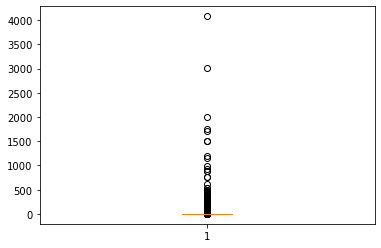

In [34]:
# visualization of outliers
import matplotlib.pyplot as plt

plt.boxplot(df["Like Count"])
plt.show()

#### Outliers Handling

#### Quantile-based Flooring and Capping

{'whiskers': [<matplotlib.lines.Line2D at 0x2bf6b6de280>,
 'caps': [<matplotlib.lines.Line2D at 0x2bf6b6deb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bf6b6de1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bf6bd84e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bf6bd84d00>],
 'means': []}

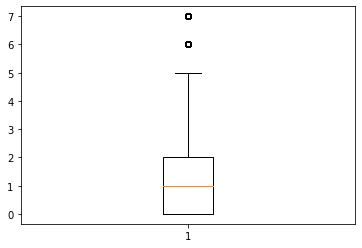

In [35]:
floor = df['Like Count'].quantile(0.10) # getting the floor value with 10%
cap = df['Like Count'].quantile(0.90) # getting the ceiling or cap value with 90%

# changing the values below floor values to floor value
df['Nw2Like Count'] = np.where(df['Like Count']<floor, floor, df['Like Count'])

# changing the values above cap values to cap value
df['Nw2Like Count'] = np.where(df['Like Count']>cap, cap, df['Like Count'])

# box plot of new values
plt.boxplot(df['Nw2Like Count'])

#### Log Transformation

(array([9.948e+03, 2.600e+01, 1.100e+01, 3.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0. ,  204.1,  408.2,  612.3,  816.4, 1020.5, 1224.6, 1428.7,
        1632.8, 1836.9, 2041. , 2245.1, 2449.2, 2653.3, 2857.4, 3061.5,
        3265.6, 3469.7, 3673.8, 3877.9, 4082. ]),
 <BarContainer object of 20 artists>)

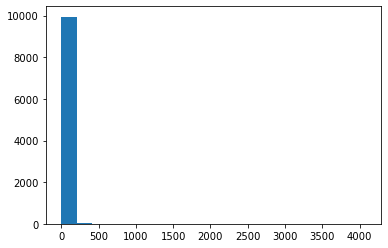

In [36]:
# Histogram plot of the feature column 'Like Count'
plt.hist(df['Like Count'], bins=20)

In [37]:
# checking for the skewness of feature column 'Like Count'
df['Like Count'].skew() 

32.50434160651931

In [38]:
# Replacing each values of feature column 'Like Count' with their logarithmic values
df['Log_Like Count'] = df['Like Count'].map(lambda i: np.log(i) if i > 0 else 0)
df['Log_Like Count']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
9996     0.0
9997     0.0
9998     0.0
9999     0.0
10000    0.0
Name: Log_Like Count, Length: 10001, dtype: float64

In [39]:
# checking for the skewness of feature column 'Like Count' with logarithmic values
df['Log_Like Count'].skew()

2.4569393778272777

(array([6.853e+03, 8.840e+02, 5.090e+02, 5.120e+02, 2.820e+02, 3.030e+02,
        1.970e+02, 1.180e+02, 1.060e+02, 8.200e+01, 5.100e+01, 3.200e+01,
        2.500e+01, 1.100e+01, 1.800e+01, 5.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.        , 0.41571712, 0.83143423, 1.24715135, 1.66286847,
        2.07858559, 2.4943027 , 2.91001982, 3.32573694, 3.74145405,
        4.15717117, 4.57288829, 4.98860541, 5.40432252, 5.82003964,
        6.23575676, 6.65147387, 7.06719099, 7.48290811, 7.89862523,
        8.31434234]),
 <BarContainer object of 20 artists>)

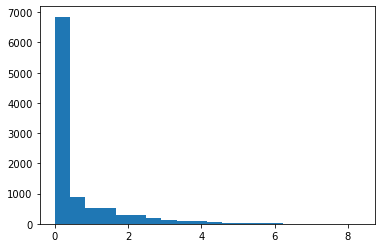

In [40]:
# Histogram plot of the feature column 'Like Count' with logarithmic values
plt.hist(df['Log_Like Count'], bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bf6bfbfbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bf6bfd0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bf6bfbf8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bf6bfd0730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bf6bfd0a00>],
 'means': []}

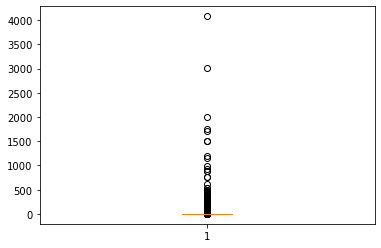

In [41]:
# Box plot of the feature column 'Like Count' without logarithmic values
plt.boxplot(df['Like Count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bf6c02afa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bf6c039580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bf6c02acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bf6c039b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bf6c039df0>],
 'means': []}

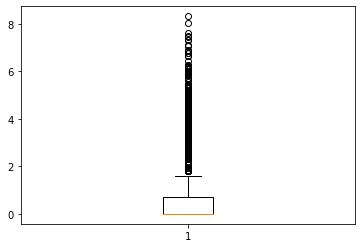

In [42]:
# Histogram plot of the feature column 'Like Count' with logarithmic values
plt.boxplot(df['Log_Like Count'])

#### Trimming

In [43]:
# Calculating IQR(Inter Quartile Range)
Q1 = df['Like Count'].quantile(0.25) # Calculating first quartile with 25%
Q3 = df['Like Count'].quantile(0.75) # Calculating third quartile with 75%
IQR = Q3 - Q1 # Calculating Inter Quartile Range

# Determining the boundaries
# lower boundary = Q1 - (1.5 * IQR)
# Upper boundary = Q3 + (1.5 * IQR)
boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]

# getting the indexes of data which are out of boundary
index = df[(df['Like Count'] >= boundary[1]) | (df['Like Count'] <= boundary[0])].index
len(index), index

(1450,
 Int64Index([   7,    9,   15,   23,   29,   30,   35,   40,   51,   52,
             ...
             9942, 9950, 9958, 9966, 9971, 9972, 9975, 9978, 9983, 9987],
            dtype='int64', length=1450))

In [44]:
# Removing all the data outside the boundary(Outliers)
df.drop(index, inplace=True)
df.head(5)

,Like Count,remove_punct,text_lemmatizer,Nw2Like Count,Log_Like Count
0,0,chatgpt,[chatgpt],0.0,0.0
1,0,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, dbdashcomb, leader]",0.0,0.0
2,0,chatgpts information load is up to november i...,"[chatgpts, information, load, november, think,...",0.0,0.0
3,1,hmm chat gpt is actually very valid,"[hmm, chat, gpt, actually, valid]",1.0,0.0
4,0,claro es que a google se le escribe como oran...,"[claro, que, google, escribe, como, orangutn, ...",0.0,0.0


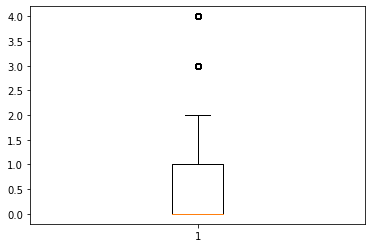

In [45]:
# visualization of outliers
import matplotlib.pyplot as plt

plt.boxplot(df["Like Count"])
plt.show()

#### Visualization of textual data

In [46]:
df.columns

Index(['Like Count', 'remove_punct', 'text_lemmatizer', 'Nw2Like Count',
       'Log_Like Count'],
      dtype='object')

In [47]:
#dropping the outlier calculation columns
df.drop(['Nw2Like Count','Log_Like Count', 'Like Count'], axis=1, inplace=True)
df.head(5)

,remove_punct,text_lemmatizer
0,chatgpt,[chatgpt]
1,chatgptsqlsql ai dbdashcomb it leaders,"[chatgptsqlsql, dbdashcomb, leader]"
2,chatgpts information load is up to november i...,"[chatgpts, information, load, november, think,..."
3,hmm chat gpt is actually very valid,"[hmm, chat, gpt, actually, valid]"
4,claro es que a google se le escribe como oran...,"[claro, que, google, escribe, como, orangutn, ..."


#### Generating N-grams

In [48]:
def get_n_gram(corpus: pd.Series, n: int=None, range: tuple=(2, 2)) -> list:
    """
        Returns n-grams from a corpus.

        ### Parameters
        corpus: pd.Series
            A dataframe series containing corpus.
        n: int 
            The number of n-grams to return.
        range: tuple
            The range of n-grams to return.

        ### Returns
        list: 
            List of top occurring n-grams
    """
    count_vector = CountVectorizer(ngram_range=range, stop_words='english').fit(corpus)
    bag_of_words =  count_vector.fit_transform(corpus)
    bg_sum = bag_of_words.sum(axis=0)
    words_freq = [(word, bg_sum[0, idx]) for word, idx in count_vector.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [49]:
# getting bi common words
bi_common_words = get_n_gram(df['remove_punct'], 15)

In [50]:
bi_common_words

[('chat gpt', 941),
 ('use chatgpt', 146),
 ('using chatgpt', 141),
 ('chatgpt ai', 112),
 ('chatgpt people', 87),
 ('asked chatgpt', 86),
 ('like chatgpt', 80),
 ('people saying', 80),
 ('google run', 80),
 ('run money', 80),
 ('saying google', 79),
 ('ask chatgpt', 73),
 ('chatgpt write', 67),
 ('chatgpt api', 59),
 ('ai chatgpt', 58)]

In [51]:
def visualization_n_gram(common_words: list, title: str) -> None:
    """
        Visualization of n-grams
        
        ### Parameters
        common_words: list
            list of common n_gram words 
            >>> [('chat gpt', 596),
                    ('character limit', 259),
                ]
        title: str
            Title of graph
        ### Return
        None
    """
    # Create a dataframe 
    vis_df = pd.DataFrame(common_words, columns=['Tweet', 'Count'])
    vis_df.plot(x='Tweet', y='Count', kind='bar', title=title)

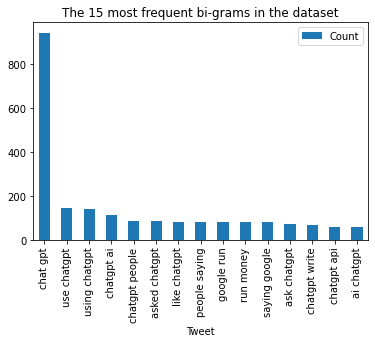

In [52]:
visualization_n_gram(common_words=bi_common_words, title='The 15 most frequent bi-grams in the dataset')

We have used CountVectorizer to find the bi-gram. This bar plot shows the 15 most frequent bi-gram in processed data. According to the bi-gram "chat gpt" has the highest frequency of count 800+ in the dataset.

In [53]:
# getting tri common words
tri_common_words = get_n_gram(df['remove_punct'], 15, range=(3,3))
tri_common_words

[('google run money', 80),
 ('chatgpt people saying', 79),
 ('people saying google', 79),
 ('saying google run', 79),
 ('working chatgptlike digital', 31),
 ('chatgptlike digital assistant', 31),
 ('digital assistant cars', 31),
 ('gm working chatgptlike', 29),
 ('la inteligencia artificial', 24),
 ('use openais chatgpt', 21),
 ('qu es chatgpt', 20),
 ('tools like chatgpt', 19),
 ('el chat gpt', 19),
 ('add chatgpt browser', 19),
 ('openais chatgpt api', 18)]

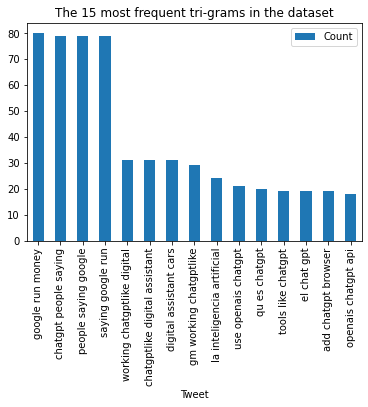

In [54]:
visualization_n_gram(tri_common_words, title='The 15 most frequent tri-grams in the dataset')

We have used CountVectorizer to find the tri-gram. This bar plot shows the 15 most frequent tri-gram in processed data. According to the tri-gram "google run money" has the highest frequency in the dataset.

#### Generating a Word-Cloud

In [55]:
# Converting the whole tokenized texts to a single text
def convert_list_to_str(text_list: list) -> str:
    """
        Convert a list of strings to a string.

        ### Parameters
        text_list: list
            A list of strings

        ### Returns
        str:
            A text of string
    """
    str_text = ''
    for i in text_list:
        str_text += i +' '
    return str_text

In [56]:
# Joining all tokenized and lemmatized words into a single string
all_text = " ".join(df['text_lemmatizer'].apply(convert_list_to_str))

In [57]:
# Generating wordCloud
word_cloud = WordCloud(
    width=3000,
    height=3000,
    stopwords=STOPWORDS,
    mode="RGBA",
    background_color='white',
).generate(all_text)

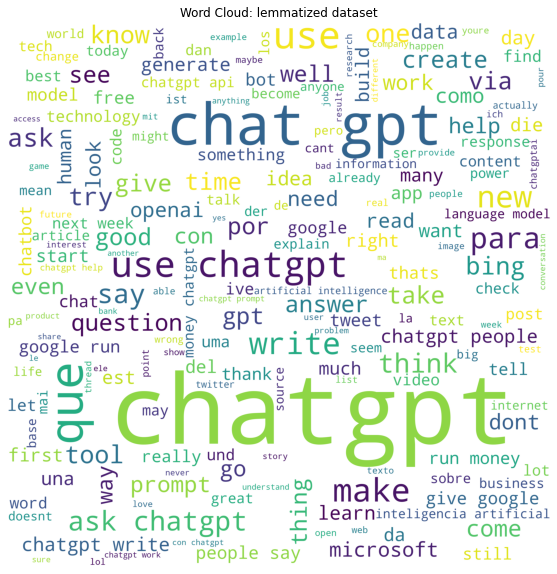

In [58]:
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word Cloud: lemmatized dataset")
plt.show()

For this word cloud, we have joined all the word from lemmatized columns.

#### Reducing the dataset for smooth processing due to lack of high physical resources 

In [59]:
# reducing the dataset for smooth processing
df = df.sample(5000)

#### Word Vectorization with TFIDF

In [60]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))

In [61]:
X = vectorizer.fit_transform(df['text_lemmatizer'].map(lambda x: ' '.join(x)).tolist())

In [62]:
X

<5000x74495 sparse matrix of type '<class 'numpy.float64'>'
	with 111372 stored elements in Compressed Sparse Row format>

In [63]:
X.shape

(5000, 74495)

In [64]:
# converting the vectorized data to dataframe
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#### Dimensionality Reduction -> Principal Component Analysis

In [65]:
from sklearn.decomposition import PCA
import numpy as np

# creating a PCA object and reducing our feature vector columns to 50
pca = PCA(n_components=50)

# fit the PCA model to the data and transform it
df = pca.fit_transform(df_tfidf)

# print the original data shape and the PCA transformed data shape
print("Original data shape: ", df_tfidf.shape)
print("Transformed data shape: ", df.shape)


Original data shape:  (5000, 74495)
Transformed data shape:  (5000, 50)


#### KMeans Clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.spatial.distance import cdist

In [68]:
# Building the clustering model and calculating the values of the Distortion and Inertia
distortions = []
inertias = []
clusters = range(1, 10)

# KMeans algorithm for cluster of 1 to 10
for k in clusters:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit_predict(df)  
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

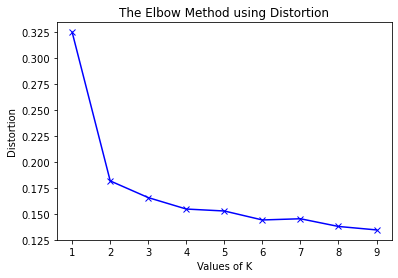

In [69]:
# Tabulating and Visualizing the results using the different values of Distortion
plt.plot(clusters, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

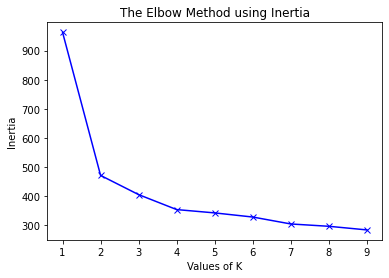

In [70]:
# Tabulating and Visualizing the results using the different values of inertias
plt.plot(clusters, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2.

In [71]:
# Implementing KMeans algorithm with optimal number of clusters =2 
clusters = 2

#Initialize the class object
kmeans = KMeans(n_clusters= clusters)

In [72]:
#predict the labels of clusters.
label = kmeans.fit_predict(df)

In [73]:
u_labels = np.unique(label)

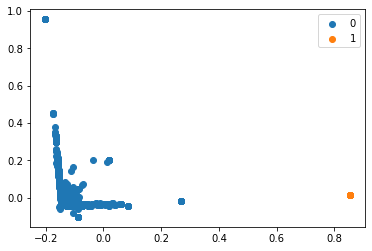

In [74]:
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

#### Pandas Profiling of final dataset

In [358]:
import pandas_profiling as pp

In [359]:
profile = pp.ProfileReport(pd.DataFrame(X_pca), minimal=True)

In [360]:
profile.to_file('chatgpt_tweets_data_profile')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]